On considère une expérience qui génère des vecteurs $\vec{a_1}, \vec{a_2},\ldots, \vec{a_n}\in \mathbb{R}^m$
(par example la température en Suisse pendant 365 jours; dans ce cas $m$ est le nombre de mesures prises chaque jour en Suisse 
et $n=365$). On construit la matrice 
\begin{equation}
A = 
\left[
  \begin{array}{cccc}
     &  &        &  \\
   \vec{ a_{1}}    & \vec{a_{2}}    & \ldots &\vec{ a_{n}}    \\
     &  &        &  
  \end{array}
\right],
\end{equation}
on effectue la SVD de $A$ et on compare $\vec{a_i}$ et 
$(\vec{a_i}^T\vec{u_1})\vec{u_1} + (\vec{a_i}^T\vec{u_2})\vec{u_2} + (\vec{a_i}^T\vec{u_3})\vec{u_3}$
avec $i=1,\frac{n}{2}, n$.
 La function svd3 contient les résultats dans le cas suivant 
\begin{equation}
\vec{a_i}=\alpha_i \sin(\pi \vec{x}) +\beta_i \sin(2\pi \vec{x}) +\gamma_i\text{sign}(\vec{x}-\frac{1}{2}) +\frac{1}{10}\vec{\delta}
\end{equation}
avec
\begin{equation}
\vec{x}=\left[ \begin{array}{c}
\frac{1}{m+1} \\
\vdots \\
\frac{m}{m+1}
\end{array} \right],
\quad
\sin(\pi\vec{x})=\left[ \begin{array}{c}
\sin(\frac{\pi}{m+1})  \\
\vdots \\
\sin(\frac{m\pi}{m+1})
\end{array} \right],
\quad
\sin(2\pi\vec{x})=\left[ \begin{array}{c}
\sin(\frac{2\pi}{m+1})  \\
\vdots \\
\sin(\frac{2m\pi}{m+1})
\end{array} \right],
\quad
\text{sign}(\vec{x}-\frac{1}{2})=\left[ \begin{array}{c}
\frac{\frac{1}{m+1}-\frac{1}{2}}{|\frac{1}{m+1}-\frac{1}{2}|} \\
\vdots \\
\frac{\frac{m}{m+1}-\frac{1}{2}}{|\frac{m}{m+1}-\frac{1}{2}|}
\end{array} \right],
\end{equation}

et $(\vec{\delta})_i=\delta_i$, où $\alpha_i$, $\beta_i$, $\gamma_i$ et $\delta_i$ sont des réalizations
d'une variable uniforme entre 0 et 1.


In [1]:
function svd3
N=20;
M=39;h=1/(M+1);
A=sparse(M,N);
x=(h:h:1-h)';
for i=1:N
  A(:,i)=rand*sin(pi*x)+rand*sin(2*pi*x)+rand*sign(x-0.5)+0.1*rand(M,1);
end
figure(1);hold on;
for i=1:N
  plot(A(:,i))
end
[U, S, V] = svd (A);
figure(2);plot(diag(S));
figure(3);hold on;
plot(A(:,1))
plot(dot(A(:,1),U(:,1))*U(:,1)+dot(A(:,1),U(:,2))*U(:,2)+dot(A(:,1),U(:,3))*U(:,3),'+')
plot(A(:,N/2))
plot(dot(A(:,N/2),U(:,1))*U(:,1)+dot(A(:,N/2),U(:,2))*U(:,2)+dot(A(:,N/2),U(:,3))*U(:,3),'+')
plot(A(:,N))
plot(dot(A(:,N),U(:,1))*U(:,1)+dot(A(:,N),U(:,2))*U(:,2)+dot(A(:,N),U(:,3))*U(:,3),'+')
end

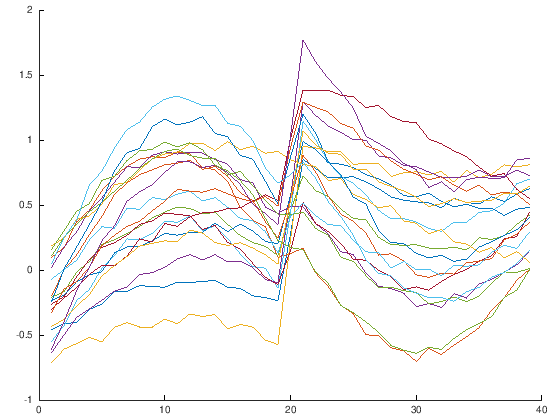

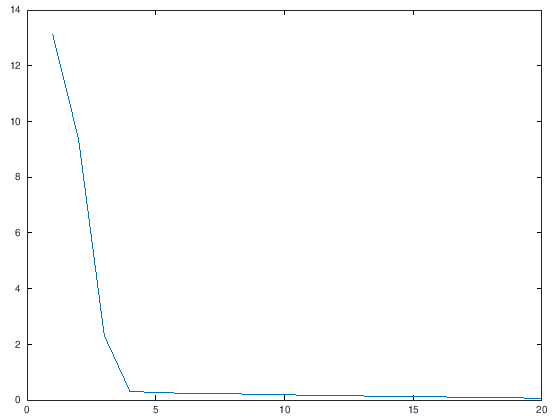

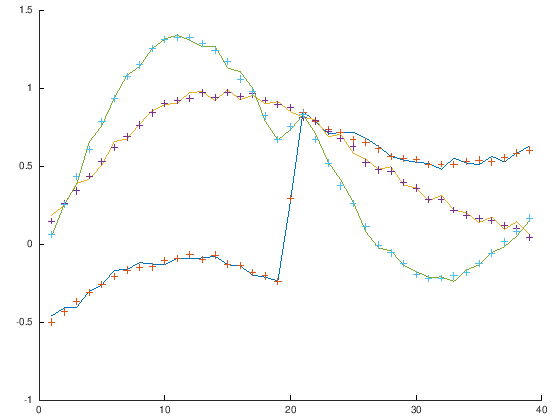

In [2]:
svd3